In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-addons
!pip install tensorflow
!pip install tensorflow keras


import os
import glob
import random
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50, InceptionV3
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 20.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [50]:
train_csv=label_df = pd.read_csv("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/Testing_set.csv")
confuse_csv = pd.read_csv("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/ConfusionMatrix.csv")

train_fol=image_files = glob.glob("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/train/*")
test_fol = glob.glob("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/*")
confuse_mtrx = glob.glob("/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/ConfusionMatrix/*")

In [30]:
train_csv.label.value_counts()
filename = train_csv['filename']
situation = train_csv['label']


confuse_csv.label.value_counts()
confuse_filename = confuse_csv['filename']
confuse_situation = confuse_csv['label']

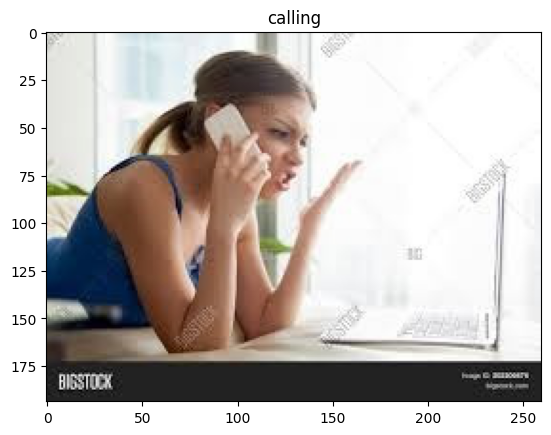

In [31]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

disp()


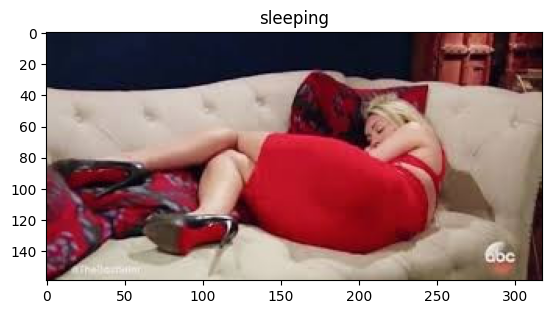

In [6]:
disp()

In [32]:
img_data = []
img_label = []
length = len(train_fol)
print("Pre-Processing Image!")
#print(len(train_fol)-602)
for i in (range(len(train_fol)-602)):
    print(i)
    t = '/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/train/' + filename[i]
    temp_img = Image.open(t)
    # plt.imshow(temp_img)
    img_resize = temp_img.resize((160,160))
    img_array=np.asarray(img_resize)
    img_data.append(img_array)
    img_label.append(situation[i])
print("Image Processed!")

Streaming output truncated to the last 5000 lines.
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189

In [33]:
# inp_shape = (160,160,3)
iii = img_data #x_train = iii. iii is the trainig data used for training
iii = np.asarray(iii)
type(iii)
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
label_map = {
    0: "sitting",
    1: "using laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}

In [42]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(15, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 32)      

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = cnn_model.fit(iii, y_train, epochs=65, validation_data=(iii, y_train), callbacks=[early_stopping])


Epoch 1/65
375/375 [==============================] - 13s 27ms/step - loss: 5.7934 - accuracy: 0.1248 - val_loss: 2.3585 - val_accuracy: 0.2371
Epoch 2/65
375/375 [==============================] - 9s 23ms/step - loss: 2.3222 - accuracy: 0.2549 - val_loss: 1.7416 - val_accuracy: 0.5018
Epoch 3/65
375/375 [==============================] - 9s 24ms/step - loss: 1.8724 - accuracy: 0.3983 - val_loss: 1.2572 - val_accuracy: 0.7000
Epoch 4/65
375/375 [==============================] - 9s 24ms/step - loss: 1.3149 - accuracy: 0.5854 - val_loss: 0.6936 - val_accuracy: 0.8369
Epoch 5/65
375/375 [==============================] - 9s 23ms/step - loss: 0.8336 - accuracy: 0.7371 - val_loss: 0.3988 - val_accuracy: 0.9154
Epoch 6/65
375/375 [==============================] - 8s 22ms/step - loss: 0.5738 - accuracy: 0.8251 - val_loss: 0.2422 - val_accuracy: 0.9429
Epoch 7/65
375/375 [==============================] - 9s 25ms/step - loss: 0.4166 - accuracy: 0.8732 - val_loss: 0.2084 - val_accuracy: 0.944

In [44]:
cnn_model.save_weights("colab_cnn_weights_model_4.h5")
cnn_model.save('colab_cnn_model_4.h5')

In [ ]:
from google.colab import files
files.download('colab_cnn_model_4.h5')
files.download('colab_cnn_weights_model_4.h5')

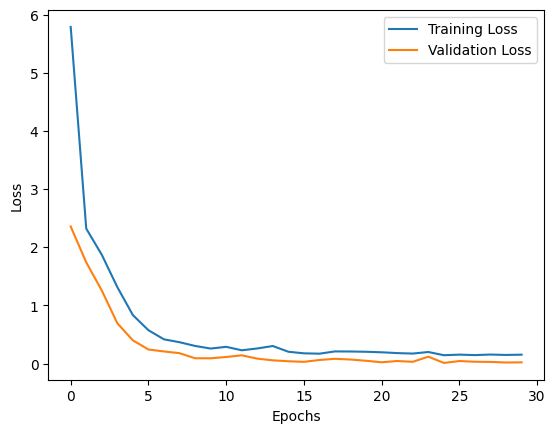

In [45]:
# losss = history.history['loss']
# plt.plot(losss)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


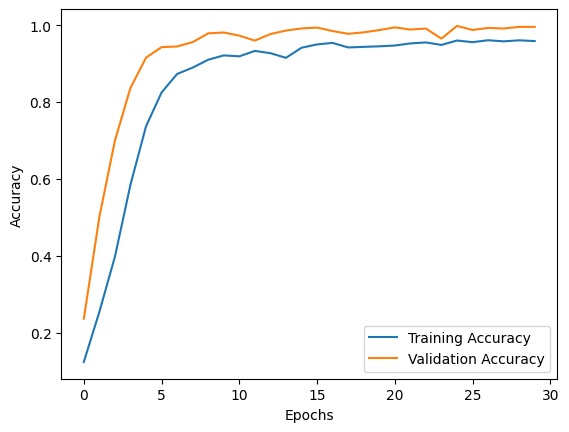

In [46]:
# accu = history.history['accuracy']
# plt.plot(accu)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).resize((160, 160))
    image_array = np.array(image) / 255.0  # Normalize pixel values between 0 and 1
    return image_array

# Function to make a prediction for an image
def make_prediction(image_path):
    image_array = preprocess_image(image_path)
    image_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension
    predictions = cnn_model.predict(image_batch)
    predicted_label = np.argmax(predictions[0])  # Get the index of the highest probability
    predicted_class = label_map[predicted_label]
    confidence = np.max(predictions[0]) * 100  # Get the confidence score
    return predicted_class, confidence

# Path to the test image folder
folder_path = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test"

# Iterate over the test images and make predictions
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg"):
        image_path = os.path.join(folder_path, file_name)
        predicted_class, confidence = make_prediction(image_path)
        print(f"Image: {image_path}")
        print(f"Predicted Class: {predicted_class}")
        print(f"Confidence: {confidence:.2f}%")
        print()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
Image: /content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/Image_1691.jpg
Predicted Class: dancing
Confidence: 51.54%

1/1 [==============================] - 0s 23ms/step
Image: /content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/Image_1351.jpg
Predicted Class: dancing
Confidence: 47.72%

1/1 [==============================] - 0s 31ms/step
Image: /content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/Image_1360.jpg
Predicted Class: dancing
Confidence: 89.71%

1/1 [==============================] - 0s 28ms/step
Image: /content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/Image_1632.jpg
Predicted Class: dancing
Confidence: 72.18%

1/1 [==============================] - 0s 38ms/step
Image: /content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test/Image_1710.jpg
Predicted Class: dancing
Confidence: 87.95%

1/1 [===================

1/1 [==============================] - 0s 22ms/step


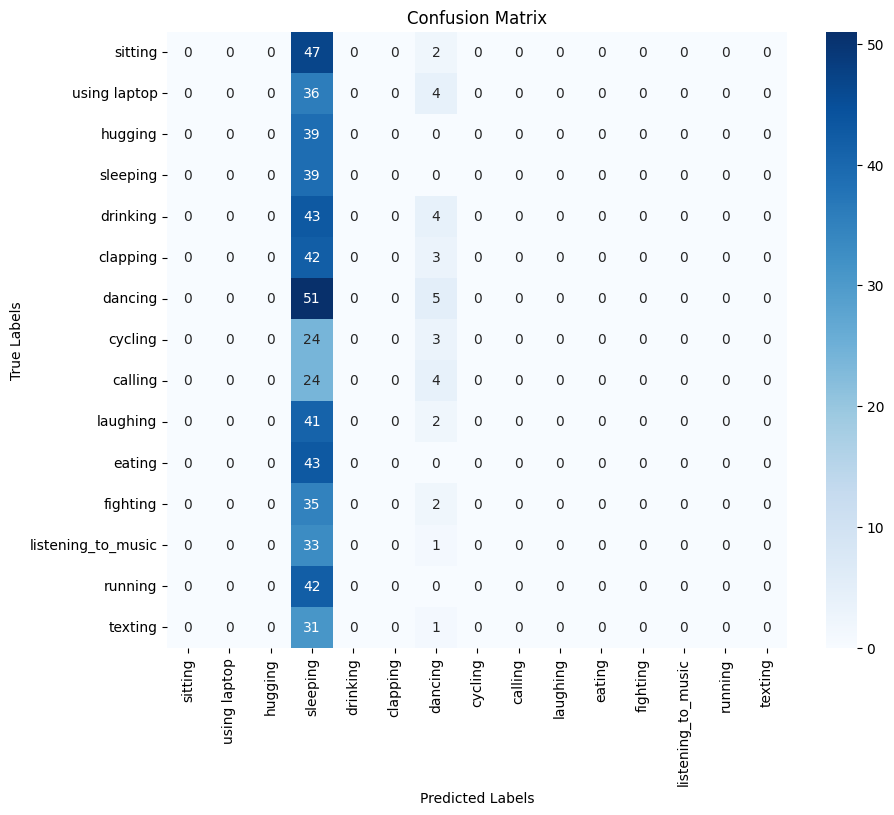

In [63]:
# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).resize((160, 160))
    image_array = np.array(image) / 255.0  # Normalize pixel values between 0 and 1
    return image_array

# Function to make a prediction for an image
def make_prediction(image_path):
    image_array = preprocess_image(image_path)
    image_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension
    predictions = cnn_model.predict(image_batch)
    predicted_label = np.argmax(predictions[0])  # Get the index of the highest probability
    predicted_class = label_map[predicted_label]
    confidence = np.max(predictions[0]) * 100  # Get the confidence score
    return predicted_class, confidence

# Path to the test image folder
folder_path = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/ConfusionMatrix"

# Initialize the true labels and predicted labels
true_labels = []
predicted_labels = []
confuse_img_data = []

# Function to get true labels from images
def get_true_label(image_path):
    if os.path.exists(image_path):
        filename = os.path.basename(image_path)
        label = confuse_csv.loc[confuse_csv['filename'] == filename, 'label']
        if len(label) == 1:
            true_labels.append(label.item())
        else:
            print("Invalid label size for image: {}".format(filename))
    else:
        print("File not found.\nSkipped")

# Preprocess the images and get true labels
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg"):
        image_path = os.path.join(folder_path, file_name)
        get_true_label(image_path)
        confuse_img_data.append(preprocess_image(image_path))
        predicted_label, _ = make_prediction(image_path)
        predicted_labels.append(predicted_label)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()










In [ ]:
# def read_image(fn):
#     image = Image.open(fn)
#     return np.asarray(image.resize((160,160)))

# def test_predict(test_image):
#     result = cnn_model.predict(np.asarray([read_image(test_image)]))
#     itemindex = np.where(result==np.max(result))
#     prediction = itemindex[1][0]
#     print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)
#     return prediction

In [ ]:
# folder_path = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test"
# predictions_df = pd.DataFrame(columns=["image_name", "prediction"])
# for file_name in os.listdir(folder_path):
#     if file_name.endswith(".jpg"): # Adjust the file extension to match your image format
#         prediction = test_predict(os.path.join(folder_path, file_name))
#         predictions_df = pd.concat([predictions_df, pd.DataFrame({"image_name": [file_name], "prediction": [prediction]})], ignore_index=True)

In [ ]:
# final=predictions_df
# final
# final["prediction"] = final["prediction"].map(label_map)
# output_filename = "cnn_model_predic.csv"
# final.to_csv(os.path.join(output_filename), index=False)

In [ ]:
# cnn_model = keras.models.load_model('colab_cnn_model_3.h5')
# def preprocess_image(image_path):
#     image = Image.open(image_path).resize((160, 160))
#     image_array = np.array(image) / 255.0  # Normalize pixel values between 0 and 1
#     return image_array

# def make_prediction(image_path):
#     image_array = preprocess_image(image_path)
#     image_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension
#     predictions = cnn_model.predict(image_batch) #making prediction using model
#     predicted_label = np.argmax(predictions[0])  # Get the index of the highest probability
#     predicted_class = label_map[predicted_label]
#     confidence = np.max(predictions[0]) * 100  # Get the confidence score
#     return predicted_class, confidence

# folder_path = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test"

# for file_name in os.listdir(folder_path):
#     if file_name.endswith(".jpg"):  # Adjust the file extension to match your image format
#         image_path = os.path.join(folder_path, file_name)
#         predicted_class, confidence = make_prediction(image_path)
#         print(f"Image: {image_path}")
#         print(f"Predicted Class: {predicted_class}")
#         print(f"Confidence: {confidence:.2f}%")
#         print()
#         image = Image.open(image_path)
#         plt.imshow(image)
#         plt.title(predicted_class)
#         plt.show()

In [ ]:
# folder_path = "/content/drive/MyDrive/HAR_Data_Set/Human Action Recognition/test"
# for file_name in os.listdir(folder_path):
#     if file_name.endswith(".jpg"):  # Adjust the file extension to match your image format
#         image_path = os.path.join(folder_path, file_name)
#         prediction = test_predict(image_path)
#         print("Image: " + image_path)
#         print("Predicted Class: " + label_map[prediction])
#         print("Confidence: {:.2f}%".format(np.max(result) * 100))
#         print()